<a href="https://colab.research.google.com/github/SuhasiniTatipalli/Heart-Failure-Prediction/blob/main/Project2_Heart_Failure_Prediction_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [2]:
# Import libraies, Mount Drive, Load Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,plot_confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2/HeartFailure_Dataset.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Prepare/clean the data for exploratory analysis purposes.

In [4]:
#Make a copy of the original df
df_h = df.copy()
df_h.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
#Check for duplicates
df_h.duplicated().sum()

0

Check for missing values. 

In [6]:
#check for nulls
df_h.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
#Ensure data types match the data types listed in the data dictionary
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df_h['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

Check for and address any inconsistent values in categorical columns.

In [9]:
dtypes = df_h.dtypes
str_Columns = dtypes[dtypes=='object'].index
str_Columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [10]:
for col in str_Columns:
    print(f"Column_Name - {col}")
    print(df_h[col].value_counts(dropna=False))
    print('\n')

Column_Name - Sex
M    725
F    193
Name: Sex, dtype: int64


Column_Name - ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


Column_Name - RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


Column_Name - ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64


Column_Name - ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64




In [11]:
#Check for and address any impossible values in numeric columns.

df_h['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [12]:
dtypes = df_h.dtypes
float_Columns = dtypes[dtypes=='float'].index
float_Columns

Index(['Oldpeak'], dtype='object')

In [13]:
for col in float_Columns:
    print(f"Column_Name - {col}")
    print(df_h[col].value_counts(dropna=False))
    print('\n')

Column_Name - Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64




In [14]:
dtypes = df_h.dtypes
int_Columns = dtypes[dtypes=='int'].index
int_Columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'HeartDisease'],
      dtype='object')

In [15]:
for col in int_Columns:
    print(f"Column_Name - {col}")
    print(df_h[col].value_counts(dropna=False))
    print('\n')

Column_Name - Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64


Column_Name - RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64


Column_Name - Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64


Column_Name - FastingBS
0    704
1    214
Name: FastingBS, dtype: int64


Column_Name - MaxHR
150    43
140    41
120    36

Univariate visuals for the target and all features.

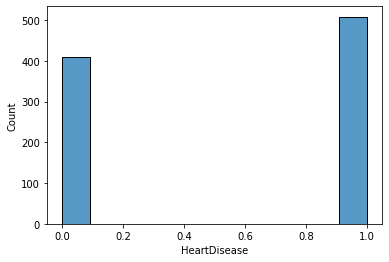

In [16]:
sns.histplot(data=df_h, x='HeartDisease');

The above graph represents a high level overview of patients with heart disease. There are 508 patients diagnosed with heart disease. Let's further breakdown and analyze this chohort.

In [17]:
# filter for heart disease patients and further analysing them
HD = df_h['HeartDisease']==1
HD
H_D=df_h.loc[HD]
H_D

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


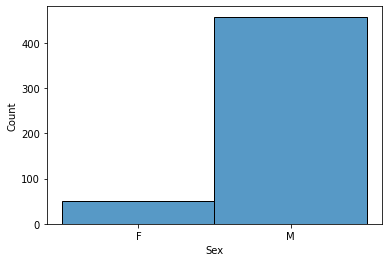

In [18]:
sns.histplot(data=H_D, x='Sex');

Above histogram shows that there are less than 100 females with heart problems and more than 400 males are having heart disease.

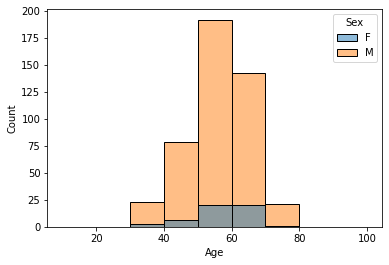

In [19]:
sns.histplot(data=H_D, x='Age',hue = 'Sex',bins=[10,20,30,40,50,60,70,80,90,100]);

Above histogram shows that when compared to female, more male are having heart disease between the age of 30 and 80. 

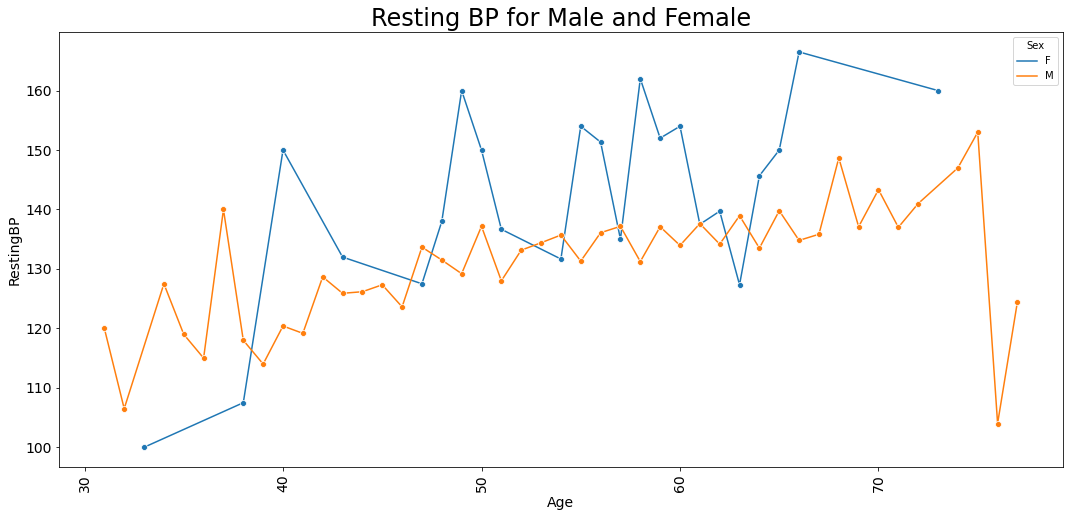

In [20]:
sns.lineplot(data = H_D, x = 'Age', y = 'RestingBP',ci = None, marker = 'o',hue = 'Sex')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(18, 8)
plt.title('Resting BP for Male and Female',fontsize=24)
plt.ylabel('RestingBP',fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.tick_params(axis='both',labelsize=14)

Above lineplot shows the resting BP for male and female from the heart disease cohort. 

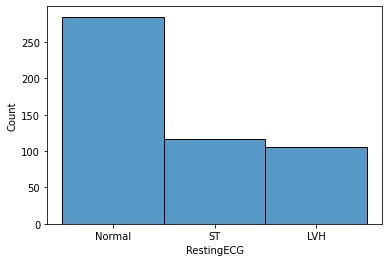

In [21]:
sns.histplot(data=H_D, x='RestingECG');

Resting ECG distribution for the same cohort.

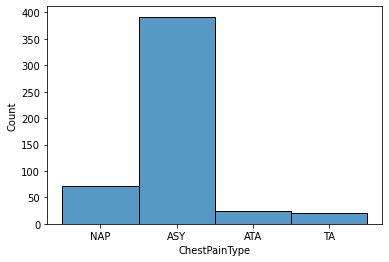

In [22]:
sns.histplot(data=H_D, x='ChestPainType');

Chest pain type distribution for the same cohort

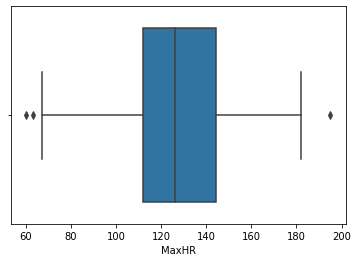

In [23]:
# Boxplot with seaborn
sns.boxplot(data=H_D, x='MaxHR');

The above boxplot shows the outliers for the max heart. 

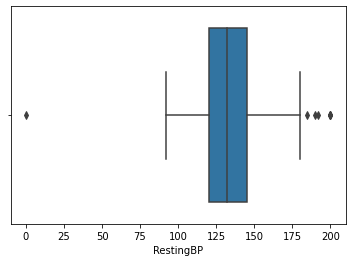

In [24]:
# Boxplot with seaborn
sns.boxplot(data=H_D, x='RestingBP');

The above boxplot shows the outliers for the resting BP.

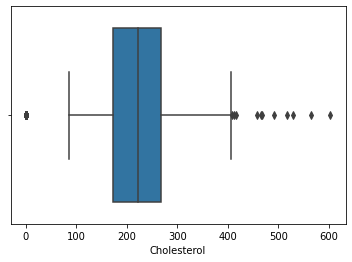

In [25]:
# Boxplot with seaborn
sns.boxplot(data=df_h, x='Cholesterol');

The above boxplot shows the outliers for the cholesterol.

**Project 2 - Part 3 (Core)**

The graphs below like pie chart, countplot are inspired & sourced from Kaggle.

Identifying any moderate or strong correlations between your target and your features and/or between one feature and another.

In [26]:
def show_corr_heatmap (df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, square=True, mask = mask)
    plt.show()

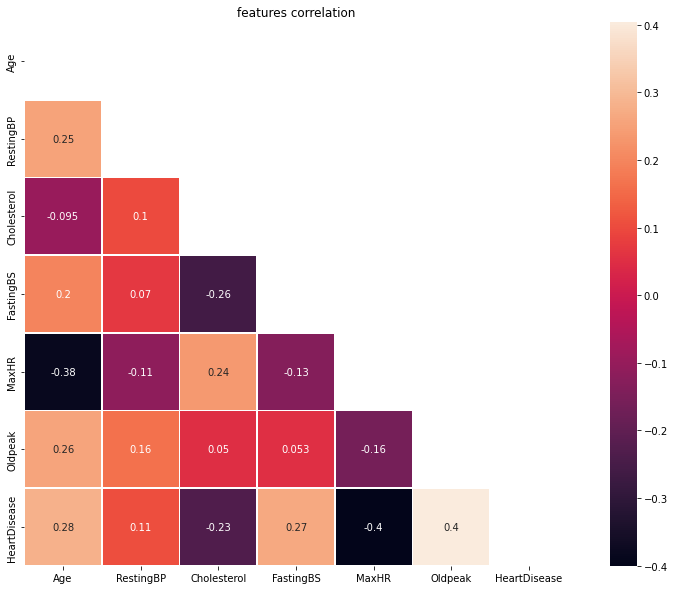

In [27]:
show_corr_heatmap(df_h, "features correlation")

Target vector is 'HeartDisease' and there is a strong corelation between Oldpeak & HeartDisease and Age & HeartDisease

Creating multivariate exploratory visuals to further understand your data.

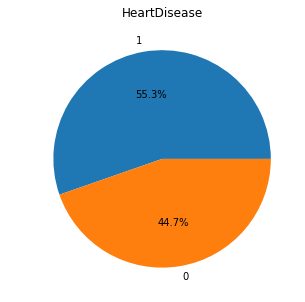

In [28]:
fig = plt.figure(figsize=(5,5))
df_h['HeartDisease'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("HeartDisease")
print("")

The above Pie chart shows that 44.7% of people with no heart disease and 55.3% with heart disease.

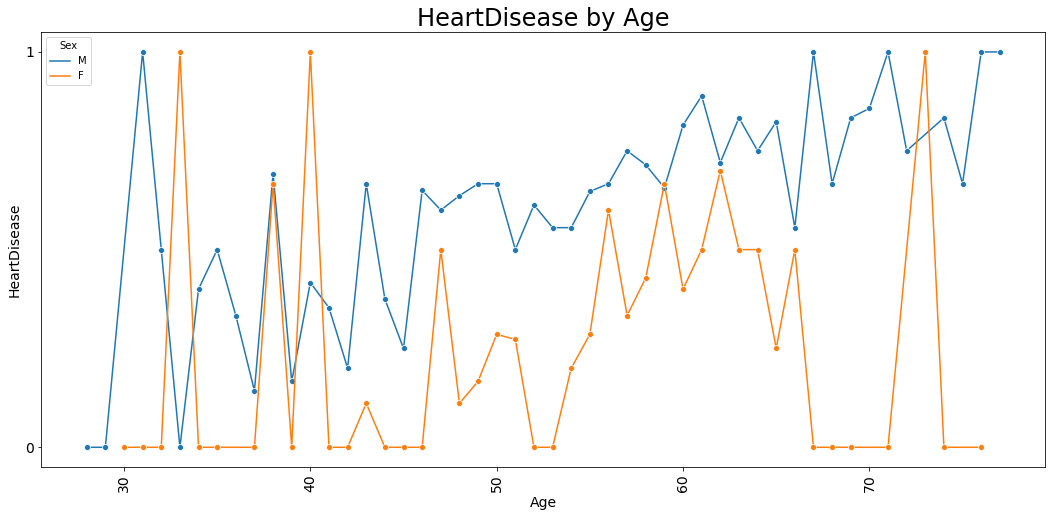

In [29]:
sns.lineplot(data = df_h, x = 'Age', y = 'HeartDisease',ci = None, marker = 'o',hue = 'Sex')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(18, 8)
plt.title('HeartDisease by Age',fontsize=24)
plt.ylabel('HeartDisease',fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.yticks([0,1])
plt.tick_params(axis='both',labelsize=14)

The above graph shows that male & female who are between the age of 30 and 40 are at high cardiovascular risk as well as the age group 65+.

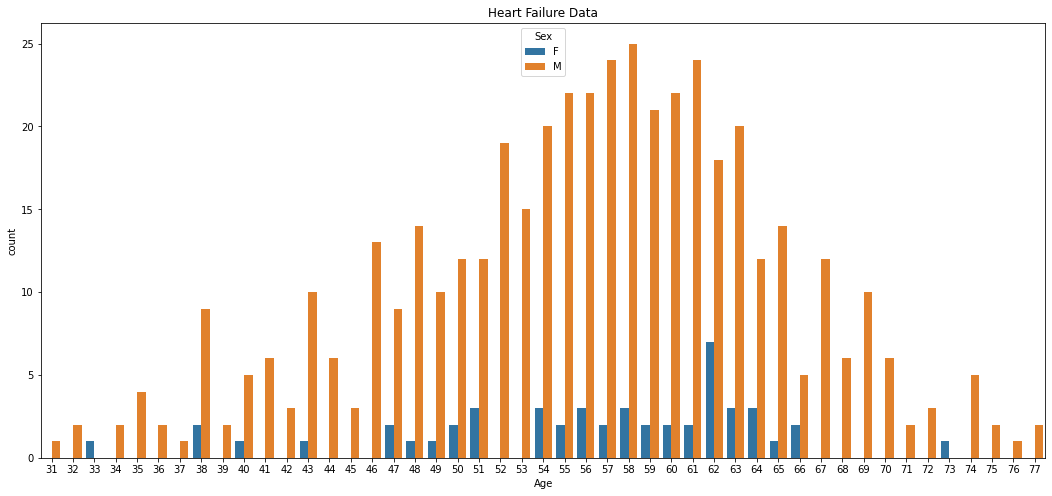

In [30]:
sns.countplot(data=H_D, x = 'Age', hue='Sex').set( title = 'Heart Failure Data')
plt.gcf().set_size_inches(18, 8)
plt.show()

Above graph shows the count of people by age and gender who are at high cardiovascular risk. 

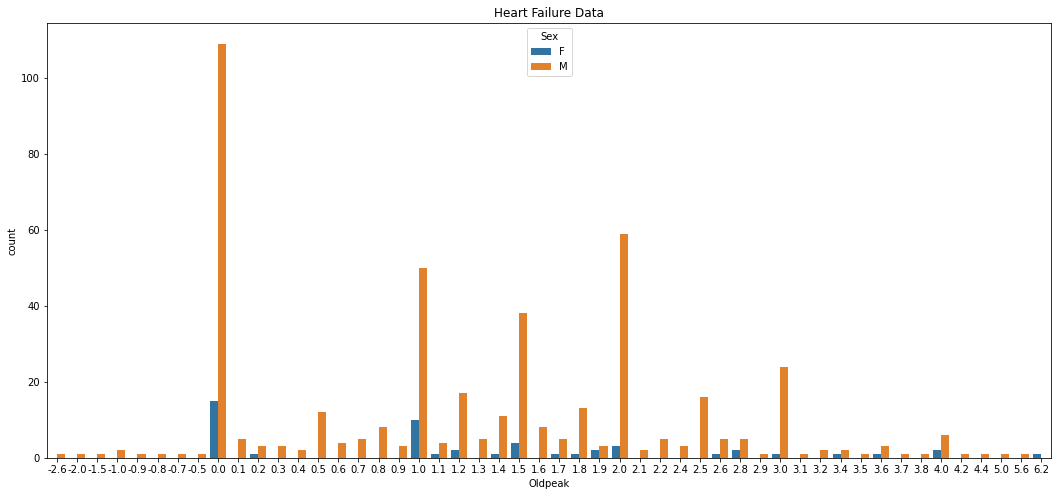

In [31]:
sns.countplot(data=H_D, x = 'Oldpeak',hue='Sex').set( title = 'Heart Failure Data')
plt.gcf().set_size_inches(18, 8)
plt.show()

ST segment depression less than 0.5 mm is accepted in all leads. ST segment depression 0.5 mm or more is considered pathological.

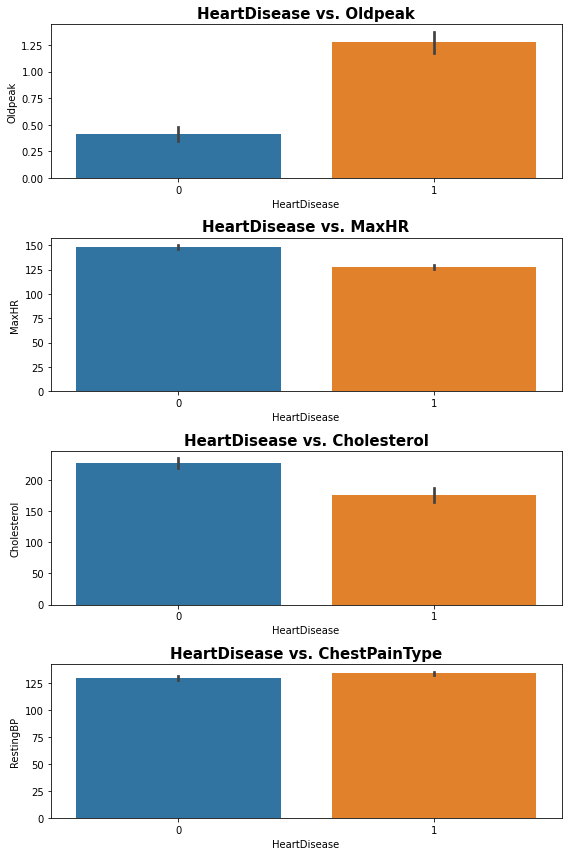

In [42]:
fig, axes = plt.subplots(nrows=4, figsize=(8,12))

sns.barplot(data=df_h, x = 'HeartDisease', y = 'Oldpeak', ax=axes[0])
axes[0].set_title('HeartDisease vs. Oldpeak', fontsize = 15, fontweight = 'bold')

sns.barplot(data=df, x = 'HeartDisease', y = 'MaxHR', ax=axes[1])
axes[1].set_title('HeartDisease vs. MaxHR', fontsize = 15, fontweight = 'bold')
#axes[1].set_xticks([0,1])

sns.barplot(data=df, x = 'HeartDisease', y = 'Cholesterol', ax=axes[2])
axes[2].set_title('HeartDisease vs. Cholesterol', fontsize = 15, fontweight = 'bold')

sns.barplot(data=df, x = 'HeartDisease', y = 'RestingBP', ax=axes[3])
axes[3].set_title('HeartDisease vs. ChestPainType', fontsize = 15, fontweight = 'bold')

fig.tight_layout()